In [174]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from itertools import combinations 

### Part 1: Get the wine dataset¶
Describe the dataset

Load in the training and test splits of the dataset

In [2]:
df_train = pd.read_csv('/Users/eiwi/Practical-ML-DS/Chapter 1. Machine Learning Foundations/DATA/winequality-red-train.csv',index_col=0)
df_test = pd.read_csv('/Users/eiwi/Practical-ML-DS/Chapter 1. Machine Learning Foundations/DATA/winequality-red-test.csv', index_col=0)

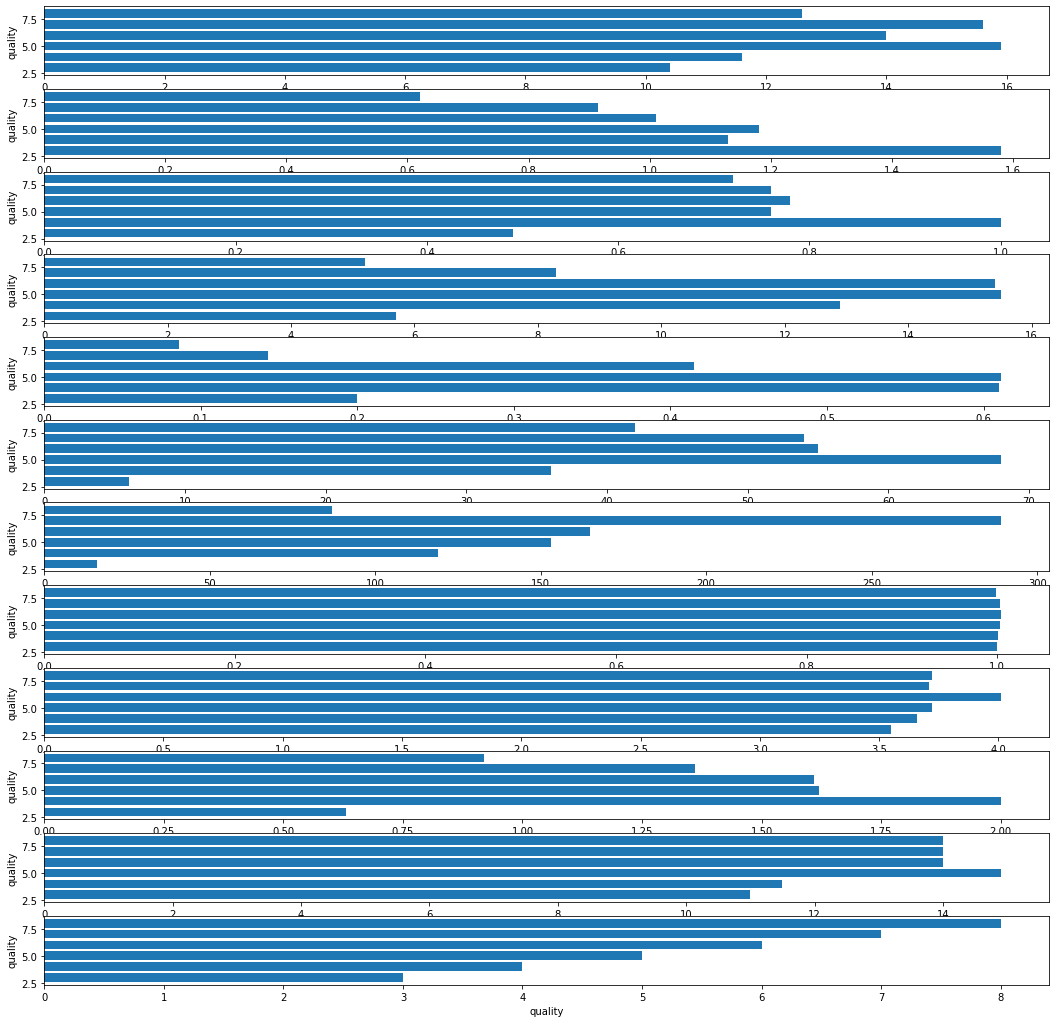

In [3]:
# The charts showing the relationship between each feature and the target
fig, ax = plt.subplots(len(df_train.columns),1, sharey = True, figsize = (18,18))
for i in range(len(df_train.columns)):
    current_col = df_train[df_train.columns[i]]
    ax[i].barh(df_train['quality'], current_col)
    ax[i].set_xlabel(str(df_train.columns[i]))
    ax[i].set_ylabel('quality')
plt.show()

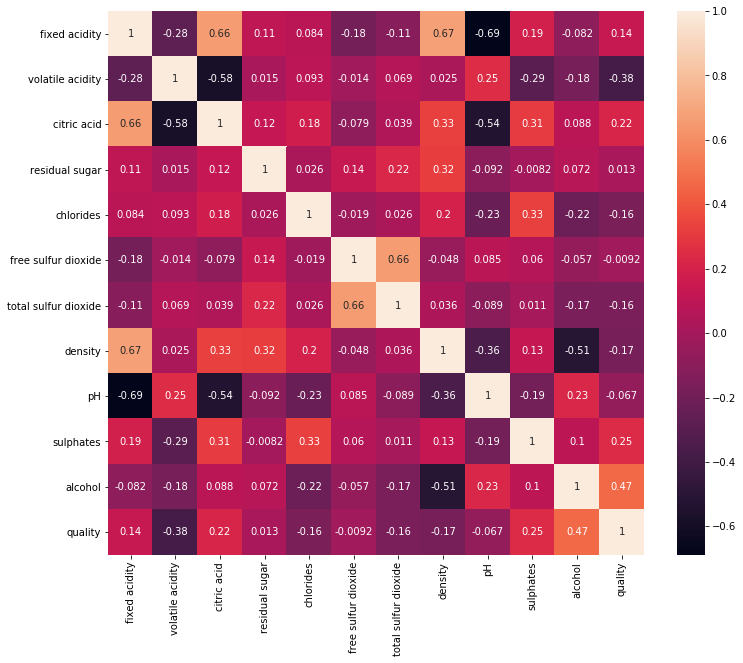

In [4]:
f, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(df_train.corr(), annot=True)

In [5]:
print("All the features given in this dataset are numeric.")
print('The most correlated features are: fixed acidity, density and citric acid, total sulfur dioxide and free sulfur dioxide, negatively correlated: fixed acidity and pH, citric and volatile acidity.')

All the features given in this dataset are numeric.
The most correlated features are: fixed acidity, density and citric acid, total sulfur dioxide and free sulfur dioxide, negatively correlated: fixed acidity and pH, citric and volatile acidity.


In [6]:
print('The Quality paremeter is mostly correlated to alcohol (positively) and volatile acidity (negatively).')

The Quality paremeter is mostly correlated to alcohol (positively) and volatile acidity (negatively)


In [7]:
# Separate target and predictors:

In [8]:
target_train = df_train.pop('quality')
target_test = df_test.pop('quality')

In [9]:
## Further split train dataset into train and validation sets

X_train, X_validation, y_train, y_validation = train_test_split(df_train, target_train, test_size=0.33, random_state=42)

In [10]:
# Set the indices in the new datasets as the subquential range of numbers 

def reset_indices(df,target):
    lst_idx = []
    for idx,_ in enumerate(df.iloc[:,0]):
        lst_idx.append(idx)
    df['index'] = lst_idx
    df.set_index(df['index'], inplace = True)
    df.drop(columns='index', inplace=True)
    target.index = lst_idx
    return df, target

In [11]:
X_train, y_train = reset_indices(X_train, y_train)

In [14]:
X_validation, y_validation = reset_indices(X_validation, y_validation)

In [15]:
X_test, y_test = reset_indices(df_test, target_test)

In [16]:
print(len(X_train))
print(len(y_train))
print(len(X_validation))
print(len(y_validation))
print(len(X_test))
print(len(y_test))

856
856
423
423
710
710


In [17]:
print('The data: train set of {} rows, validation set of {} rows, test set of {} rows.'.format(len(X_train), len(X_validation), len(df_test)), end = '\n')
print('Number of predictors: {}. List of predictors: {}.  Target: {}. Possible classes : {}.'.format(len(X_train.columns), ', '.join(X_train.columns), 'column "quality"', str(set(target_train))), end = '\n')
print('Missing values for train set: {}, for validation set: {}, for test set: {}.'.format(X_train.isna().sum().sum(), X_validation.isna().sum().sum(), df_test.isna().sum().sum()))

The data: train set of 856 rows, validation set of 423 rows, test set of 710 rows.
Number of predictors: 11. List of predictors: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol.  Target: column "quality". Possible classes : {3, 4, 5, 6, 7, 8}.
Missing values for train set: 0, for validation set: 0, for test set: 0.


In [18]:
# The data requires scaling due to the difference in units:
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000
mean,8.375935,0.521367,0.277103,2.443633,0.087557,15.911799,46.172897,0.996790,3.306542,0.659416,10.367874
std,1.687797,0.173780,0.192089,1.232777,0.046981,10.016950,31.876487,0.001759,0.147620,0.161180,1.051666
min,4.900000,0.120000,0.000000,1.200000,0.012000,1.000000,6.000000,0.990640,2.740000,0.370000,8.500000
25%,7.200000,0.390000,0.100000,1.900000,0.071000,8.000000,23.000000,0.995640,3.210000,0.560000,9.500000
50%,8.000000,0.515000,0.260000,2.200000,0.080000,14.000000,38.000000,0.996800,3.310000,0.630000,10.100000
75%,9.400000,0.636250,0.430000,2.500000,0.091000,22.000000,60.000000,0.997833,3.400000,0.730000,11.000000
max,15.900000,1.180000,1.000000,15.400000,0.611000,68.000000,289.000000,1.003690,3.900000,2.000000,14.900000


In [19]:
# Data scaling 
scaler = StandardScaler()
X_train_std = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_validation_std = pd.DataFrame(scaler.fit_transform(X_validation),  columns = X_validation.columns)
X_test_std = pd.DataFrame(scaler.fit_transform(df_test), columns = df_test.columns)

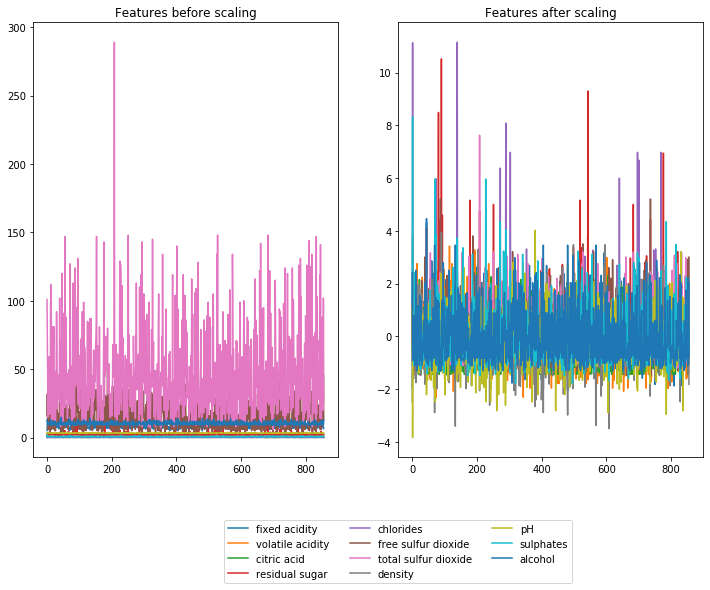

In [20]:
fig, ax = plt.subplots(1,2, figsize = (12,8))
ax[0].plot(X_train)
ax[0].set_title('Features before scaling')
ax[1].plot(X_train_std)
ax[1].set_title('Features after scaling')
plt.legend(X_train.columns, loc="lower center", bbox_to_anchor=(0, -0.3),  ncol= 3)
plt.show()

In [21]:
# Now, the data is ready to be fed to the model. 
# I will treat this as a classification problem and will try several basic models to
# get an idea of the most suitable algorithm and hyper parameters.

### Part 2: Fit models to the wine dataset and test performance
Make sure you are comfortable with passing the data through a model.

Evaluate the performance of the model. 

Make sure you are testing it on the right set of data.


In [23]:
results_dict = {'model':[],
                'params':[],
                'train_score':[],
                'validation_score':[]
               }

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

models_lst = [
    LogisticRegression(random_state=42),
    SVC(gamma=2, random_state=42),
    MLPClassifier(max_iter=1000, random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    DecisionTreeClassifier(random_state=42),
   ]

In [25]:
params = [
    {'penalty':('l1','l2', 'elasticnet', 'none'), 'C':(0.025, 0.01,1,10), 'solver': ('newton-cg', 'lbfgs', 'liblinear','sag','saga')},
    {'C':(0.025, 0.01,1,10), 'kernel':('linear', 'rbf'), 'decision_function_shape':('ovr','ovo')},
    {'activation':('relu', 'logistic'), 'solver':('sgd','lbfgs'), 'alpha':(0.001,0.01,0.1,1), 'learning_rate': ('adaptive','constant')},
    {'n_neighbors':(3,5,10), 'weights':('distance','uniform'), 'algorithm':('auto','ball_tree','kd_tree')},
    {'criterion':('gini','entropy'), 'splitter':('best','random'),'max_depth':(5,10,25), 'min_samples_split':(2,3,5)}
]

In [26]:
for i in range(len(models_lst)):
    model = models_lst[i]
    parameters = params[i]
    grid_search_model = GridSearchCV(model, parameters)
    grid_search_model.fit(X_train,y_train)
    train_score =  grid_search_model.best_score_
    validation_score = grid_search_model.best_estimator_.score(X_validation,y_validation)
    results_dict['model'].append(grid_search_model.best_estimator_)
    results_dict['params'].append(grid_search_model.best_params_)
    results_dict['train_score'].append(train_score)
    results_dict['validation_score'].append(validation_score)

In [27]:
results_dict

{'model': [LogisticRegression(C=0.025, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='none',
                     random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                     warm_start=False),
  SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf', max_iter=-1,
      probability=False, random_state=42, shrinking=True, tol=0.001,
      verbose=False),
  MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto', beta_1=0.9,
                beta_2=0.999, early_stopping=False, epsilon=1e-08,
                hidden_layer_sizes=(100,), learning_rate='adaptive',
                learning_rate_init=0.001, max_fun=15000, max_iter=1000,
                momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
                power_t=0.5, ra

In [28]:
classifiers_comparison = pd.DataFrame.from_dict(results_dict)

In [29]:
classifiers_comparison.to_csv('/Users/eiwi/Practical-ML-DS/Chapter 1. Machine Learning Foundations/PROJECT/classifiers_comparison.csv')

In [30]:
classifiers_comparison

,model,params,train_score,validation_score
0,"LogisticRegression(C=0.025, class_weight=None,...","{'C': 0.025, 'penalty': 'none', 'solver': 'new...",0.588780,0.583924
1,"SVC(C=10, break_ties=False, cache_size=200, cl...","{'C': 10, 'decision_function_shape': 'ovr', 'k...",0.669393,0.671395
2,"MLPClassifier(activation='logistic', alpha=0.0...","{'activation': 'logistic', 'alpha': 0.001, 'le...",0.640283,0.614657
3,"KNeighborsClassifier(algorithm='auto', leaf_si...","{'algorithm': 'auto', 'n_neighbors': 10, 'weig...",0.676411,0.721040
4,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...","{'criterion': 'entropy', 'max_depth': 25, 'min...",0.677513,0.725768


In [31]:
best_train_score = classifiers_comparison['train_score'].max()
print('best_train_score: ', best_train_score)
print('best_train_score_model: ', classifiers_comparison['model'][classifiers_comparison['train_score']==best_train_score], end = '\n')
 
print('\n')    

second_best_train_score = list(classifiers_comparison['train_score'].sort_values(ascending = False))[1]
print('second_best_train_score: ', second_best_train_score)
print('second_best_train_score_model: ', classifiers_comparison['model'][classifiers_comparison['train_score']==second_best_train_score], end = '\n')

print('\n')    

best_validation_score = classifiers_comparison['validation_score'].max()
print('best_validation_score: ', best_validation_score)
print('best_validation_score_model: ', classifiers_comparison['model'][classifiers_comparison['validation_score']==best_validation_score], end = '\n')
 
print('\n')    

second_best_validation_score = list(classifiers_comparison['validation_score'].sort_values(ascending = False))[1]
print('second_best_validation_score: ', second_best_validation_score)
print('second_best_validation_score_model: ', classifiers_comparison['model'][classifiers_comparison['validation_score']==second_best_validation_score], end = '\n')



best_train_score:  0.6775125798993609
best_train_score_model:  4    DecisionTreeClassifier(ccp_alpha=0.0, class_we...
Name: model, dtype: object


second_best_train_score:  0.6764109887120903
second_best_train_score_model:  3    KNeighborsClassifier(algorithm='auto', leaf_si...
Name: model, dtype: object


best_validation_score:  0.7257683215130024
best_validation_score_model:  4    DecisionTreeClassifier(ccp_alpha=0.0, class_we...
Name: model, dtype: object


second_best_validation_score:  0.7210401891252955
second_best_validation_score_model:  3    KNeighborsClassifier(algorithm='auto', leaf_si...
Name: model, dtype: object


In [32]:
print('So far the best models were {} and {}, so I will try to combine them into an ensemble.'.format('DecisionTreeClassifier', 'KNeighborsClassifier' ))

So far the best models were DecisionTreeClassifier and KNeighborsClassifier, so I will try to combine them into an ensemble.


### Part 3: Improve your performance by ensembling some of your models
Combine the results of more than one model

Evaluate the performance of the ensemble

In [138]:
from sklearn.ensemble import VotingClassifier, StackingClassifier, AdaBoostClassifier, BaggingClassifier, RandomForestClassifier

In [139]:
ensembles_results = {
    'ensemble':[],
    'train_score':[],
    'validation_score':[]
}

In [140]:
# First, I will combine DecisionTreeClassifier + KNeighborsClassifier 
# using ensemble called VotingClassifier a) with hard vote b) with soft vote

In [141]:
# a) VotingClassifier with a hard vote: the classifier uses 
# predicted class labels for majority rule voting.

In [142]:
knn_estimator =  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=-1, n_neighbors=10, p=2)

dtc_estimator = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                         max_depth=25, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=3,
                         min_weight_fraction_leaf=0.0,splitter='best')

In [143]:
hard_voting_ensemble = VotingClassifier(estimators=[('knn_estimator',knn_estimator), ('dtc_estimator',dtc_estimator)],
                                   voting='hard')


In [144]:
hard_voting_ensemble.fit(X_train, y_train)

ensembles_results['ensemble'].append('VotingClassifier_hard')
ensembles_results['train_score'].append(hard_voting_ensemble.score(X_train, y_train))
ensembles_results['validation_score'].append(hard_voting_ensemble.score(X_validation,y_validation))

In [145]:
# b) VotingClassifier with a soft vote: predicts the class label based on the argmax 
# of the sums of the predicted probabilities

In [146]:
soft_voting_ensemble = VotingClassifier(estimators=[('knn_estimator',knn_estimator), ('dtc_estimator',dtc_estimator)],
                                   voting='soft')

In [147]:
soft_voting_ensemble.fit(X_train, y_train)

ensembles_results['ensemble'].append('VotingClassifier_soft')
ensembles_results['train_score'].append(soft_voting_ensemble.score(X_train, y_train))
ensembles_results['validation_score'].append(soft_voting_ensemble.score(X_validation,y_validation))

In [148]:
# Secondly, I will use StackingClassifier with the same DecisionTreeClassifier + KNeighborsClassifier 

stacking_ensemble = StackingClassifier(estimators=[('knn_estimator',knn_estimator), ('dtc_estimator',dtc_estimator)])

stacking_ensemble.fit(X_train, y_train)

ensembles_results['ensemble'].append('StackingClassifier')
ensembles_results['train_score'].append(stacking_ensemble.score(X_train, y_train))
ensembles_results['validation_score'].append(stacking_ensemble.score(X_validation,y_validation))

In [149]:
# Compare StackingClassifier with final AdaBoostClassifier
ada_stacking_ensemble = StackingClassifier(estimators=[('knn_estimator',knn_estimator), 
                                                       ('dtc_estimator',dtc_estimator)],
                                           final_estimator=None,
                                           stack_method='auto',
                                           n_jobs=-1)

ada_stacking_ensemble.fit(X_train, y_train)

ensembles_results['ensemble'].append('StackingClassifier_AdaBoost')
ensembles_results['train_score'].append(ada_stacking_ensemble.score(X_train, y_train))
ensembles_results['validation_score'].append(ada_stacking_ensemble.score(X_validation,y_validation))

In [150]:
# Then compare ensemble perfomance with a BaggingClassifier 
# using multiple KNeighborsClassifiers OR DecisionTreeClassifiers

In [151]:
# a) BaggingClassifier with DecisionTreeClassifier

In [152]:
dtc_bagging_ensemble = BaggingClassifier(base_estimator = dtc_estimator,
                                         n_estimators=100,
                                         random_state=42)

dtc_bagging_ensemble.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=25,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=3,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,

In [153]:
ensembles_results['ensemble'].append('DTC_BaggingClassifier')
ensembles_results['train_score'].append(dtc_bagging_ensemble.score(X_train, y_train))
ensembles_results['validation_score'].append(dtc_bagging_ensemble.score(X_validation,y_validation))

In [154]:
# b) BaggingClassifier with KNeighborsClassifiers

In [155]:
knn_bagging_ensemble = BaggingClassifier(base_estimator=knn_estimator,
                                     n_estimators=100,
                                     random_state=42)

In [156]:
knn_bagging_ensemble.fit(X_train, y_train)

ensembles_results['ensemble'].append('KNN_BaggingClassifier')
ensembles_results['train_score'].append(knn_bagging_ensemble.score(X_train, y_train))
ensembles_results['validation_score'].append(knn_bagging_ensemble.score(X_validation,y_validation))

In [157]:
# As DecisionTreeclassifier was the most cussessful in previous ensembles,
# now I will try out RandomForestClassifier

In [158]:
rfc_ensemble = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_ensemble.base_estimator = dtc_estimator

In [159]:
rfc_ensemble.fit(X_train, y_train)

ensembles_results['ensemble'].append('RandomForestClassifier')
ensembles_results['train_score'].append(rfc_ensemble.score(X_train, y_train))
ensembles_results['validation_score'].append(rfc_ensemble.score(X_validation,y_validation))

In [160]:
#Compare with AdaBoostClassifier based on DecisionTreeClassifiers only 
# (as KNeighborsClassifier doesn't support sample_weight)

In [161]:
dtc_ada_ensemble = AdaBoostClassifier(base_estimator= dtc_estimator, n_estimators=50, 
                                      learning_rate=1.0, algorithm='SAMME.R', 
                                      random_state=42)
dtc_ada_ensemble.fit(X_train, y_train)

ensembles_results['ensemble'].append('AdaBoost_dtc_ensemble')
ensembles_results['train_score'].append(dtc_ada_ensemble.score(X_train, y_train))
ensembles_results['validation_score'].append(dtc_ada_ensemble.score(X_validation, y_validation))

In [162]:
# Now let's compare these ensembles

In [163]:
ensembles_results

{'ensemble': ['VotingClassifier_hard',
  'VotingClassifier_soft',
  'StackingClassifier',
  'StackingClassifier_AdaBoost',
  'DTC_BaggingClassifier',
  'KNN_BaggingClassifier',
  'RandomForestClassifier',
  'AdaBoost_dtc_ensemble'],
 'train_score': [0.7605140186915887,
  0.9848130841121495,
  0.9521028037383178,
  0.9591121495327103,
  1.0,
  0.6413551401869159,
  1.0,
  1.0],
 'validation_score': [0.6099290780141844,
  0.7328605200945626,
  0.7328605200945626,
  0.7328605200945626,
  0.8226950354609929,
  0.5319148936170213,
  0.817966903073286,
  0.7706855791962175]}

In [164]:
ensembles_comparison = pd.DataFrame.from_dict(ensembles_results)

In [165]:
ensembles_comparison

,ensemble,train_score,validation_score
0,VotingClassifier_hard,0.760514,0.609929
1,VotingClassifier_soft,0.984813,0.732861
2,StackingClassifier,0.952103,0.732861
3,StackingClassifier_AdaBoost,0.959112,0.732861
4,DTC_BaggingClassifier,1.000000,0.822695
5,KNN_BaggingClassifier,0.641355,0.531915
6,RandomForestClassifier,1.000000,0.817967
7,AdaBoost_dtc_ensemble,1.000000,0.770686


In [166]:
# Conclusion: the highest validation score of 0.822695 was achieved with DTC_BaggingClassifier
# The second best score of 0.817967 was achieved with RandomForestClassifier
# Surprisingly, VotingClassifier and StackingClassifier combining different base models
# have worse perfomanse than ensembles with 1 estimator (RandomForestClassifier, DTC_BaggingClassifier)

### Part 4: Write an algorithm to find the best combination of models and hyperparameters.

There are an infinite number of ways that you could combine different models with different hyperparameters, but some will perform better than others.

List the different parameters which you test over, as well as the ranges which you test

Describe the search procedure which your algorithm implements

In [767]:
from sklearn.model_selection import cross_val_score

In [773]:
best_combination_search = {
    'models':[],
    'train_score':[],
}

In [774]:
def algo_name(est):
    return est.__class__.__name__
def algo_voting_soft_classifier(estimators_list, param_grid_list, N, X, y, scoring='f1'):
    """
        This function searches for best combination of model and hyperparameters to be used in VotingClasifier(soft)
    
        estimators_list — list of non-fitted estimators
        param_grid_list — list of param grids for GridSearch, must be same size as estimators_list
        N — number of models to use in ensemble
        X — features
        y — target
        scoring — scoring function name (string)
    """
    
    # Lists must be of same size
    assert len(estimators_list) == len(param_grid_list)
    
    # Can't use more estimators than we have
    assert N <= len(estimators_list)
    
    # We will keep list of best fitted estimators
    best_estimators = []
    
    # Let's GridSearch em all
    for estimator, param_grid in zip(estimators_list, param_grid_list):
        print("Searching best params for " + algo_name(estimator))
        gs = GridSearchCV(estimator, param_grid, scoring=scoring)
        gs.fit(X,y)
        best_estimators.append(gs.best_estimator_)
        print("Best score = " + str(gs.best_score_))
        
    # Here we have all possible combinations of N estimators
    all_combinations = list(combinations(best_estimators, N))
    
    # Keep track of best ensemble yet
    top_score = 0
    top_ensemble = None
    
    # Go over all combinations
    for t in all_combinations:
        voting_estimators = []
        voting_estimators_names = []
        
        # Construct list of estimators for VotingClassifier
        for estimator in list(t):
            name = algo_name(estimator)
            voting_estimators_names.append(name)
            voting_estimators.append((name, estimator))
        
            
        print(f"\n\nChecking combination of {N} estimators:")
        print("\t\n".join(voting_estimators_names))
        # Cross-validating ensemble of N estimators
        soft_voting_ensemble = VotingClassifier(estimators=voting_estimators, voting='soft')
        cross_vals = cross_val_score(soft_voting_ensemble, X,y, scoring=scoring)
        
        
        # Selecting top ensemble
        current_score = max(cross_vals)
        
        # Save the results
        best_combination_search['models'].append(voting_estimators)
        best_combination_search['train_score'].append(current_score)
        
        
        print(f"Score ({scoring}) of this combination is {current_score}")
        if (current_score>top_score):
            top_score = current_score
            top_ensemble = soft_voting_ensemble
            
        
       
    return top_ensemble        

In [775]:
estimators_list = [
    LogisticRegression(random_state=42, n_jobs=-1),
    SVC(gamma=2, random_state=42, probability=True),
#     MLPClassifier(max_iter=1000, random_state=42),
#     KNeighborsClassifier(n_jobs=-1),
    DecisionTreeClassifier(random_state=42)
]

param_grids_list = [
    {'penalty':('l1','l2', 'elasticnet', 'none'), 'C':(0.025, 0.01,1,10), 'solver': ('newton-cg', 'lbfgs', 'liblinear','sag','saga')},
    {'C':(0.025, 0.01,1,10), 'kernel':('linear', 'rbf'), 'decision_function_shape':('ovr','ovo')},
#     {'activation':('relu', 'logistic'), 'solver':('sgd','lbfgs'), 'alpha':(0.001,0.01,0.1,1), 'learning_rate': ('adaptive','constant')},
#     {'n_neighbors':(3,5,10), 'weights':('distance','uniform'), 'algorithm':('auto','ball_tree','kd_tree')},
    {'criterion':('gini','entropy'), 'splitter':('best','random'),'max_depth':(5,10,25,50), 'min_samples_split':(2,3,5,10)}
]


In [776]:
demo_X = X_train[:100]
demo_y = y_train[:100]

In [777]:
import warnings
warnings.filterwarnings("ignore")
best_voter = algo_voting_soft_classifier(estimators_list, param_grids_list, 2, demo_X, demo_y, scoring='accuracy')
warnings.filterwarnings("default")

Searching best params for LogisticRegression
Best score = 0.53
Searching best params for SVC
Best score = 0.63
Searching best params for DecisionTreeClassifier
Best score = 0.6399999999999999


Checking combination of 2 estimators:
LogisticRegression	
SVC
Score (accuracy) of this combination is 0.7


Checking combination of 2 estimators:
LogisticRegression	
DecisionTreeClassifier
Score (accuracy) of this combination is 0.7


Checking combination of 2 estimators:
SVC	
DecisionTreeClassifier
Score (accuracy) of this combination is 0.7


In [778]:
best_voter

VotingClassifier(estimators=[('LogisticRegression',
                              LogisticRegression(C=1, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto', n_jobs=-1,
                                                 penalty='l1', random_state=42,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('SVC',
                              SVC(C=1, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma=2, kernel='linear', max_iter=-1,
   

In [779]:
warnings.filterwarnings("ignore")
best_voter_3 = algo_voting_soft_classifier(estimators_list, param_grids_list, 3, demo_X, demo_y, scoring='accuracy')
warnings.filterwarnings("default")

Searching best params for LogisticRegression
Best score = 0.53
Searching best params for SVC
Best score = 0.63
Searching best params for DecisionTreeClassifier
Best score = 0.6399999999999999


Checking combination of 3 estimators:
LogisticRegression	
SVC	
DecisionTreeClassifier
Score (accuracy) of this combination is 0.7


In [780]:
best_voter_3

VotingClassifier(estimators=[('LogisticRegression',
                              LogisticRegression(C=1, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto', n_jobs=-1,
                                                 penalty='l1', random_state=42,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('SVC',
                              SVC(C=1, break_ties=False, cache_size=200,
                                  class_weight=None...
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                    

### Part 5: Present your results

The final part of the project requires you to attempt to summarise your work. It should be clear how we could replicate the results by implementing exactly the same ensemble (models and hyperparameters).

Please try to communicate and display your results with any graphs or charts.
If you have any insights into why certain ensembles or models perform better of worse than others, and would like to write a paragraph to explain this, we'd love to read it!
Please also write a summary paragraph that describes the best permutation that you found.

In [ ]:
# Based on my observation, the individual models  show lower score than ensembles

In [676]:
print( 'The average score among individual models is equal to {}, maximum validation score - {} (provided by {}).'.format(round(classifiers_comparison['validation_score'].mean(),3), round(classifiers_comparison['validation_score'],3).max(), str(classifiers_comparison[classifiers_comparison['validation_score'] == classifiers_comparison['validation_score'].max()]['model'])[5:27]))

The average score among individual models is equal to 0.663, maximum validation score - 0.726 (provided by DecisionTreeClassifier).


In [710]:
print('The average score among ensembles is equal to {}, maximum validation score - {} (provided by {}).'.format(round(ensembles_comparison['validation_score'].mean(),3),
                        round(ensembles_comparison['validation_score'].max(),3),
                        str(ensembles_comparison[ensembles_comparison['validation_score'] == ensembles_comparison['validation_score'].max()]['ensemble'])[5:27]))

The average score among ensembles is equal to 0.719, maximum validation score - 0.823 (provided by DTC_BaggingClassifier
).


In [ ]:
# The most powerful individual models are DecisionTreeClassifier and KNeighborsClassifier.
# The most powerful ensembles are DTC_BaggingClassifier and RandomForestClassifier (both are based on DecisionTreeClassifier)

In [ ]:
# Single models VS ensembles

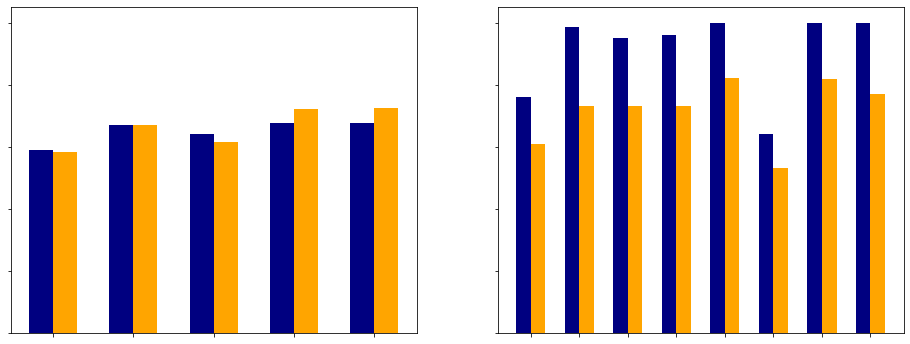

In [718]:
fig, ax = plt.subplots(1, 2, figsize = (16,6), sharey = True)

ax[0].bar(classifiers_comparison.index, classifiers_comparison['train_score'], width = -0.3, align = 'edge', color='navy')
ax[0].bar(classifiers_comparison.index, classifiers_comparison['validation_score'], width = 0.3, align = 'edge', color='orange')
ax[0].set_title('Score of the individual models')

ax[1].bar(ensembles_comparison.index, ensembles_comparison['train_score'], width = -0.3, align = 'edge', color='navy')
ax[1].bar(ensembles_comparison.index, ensembles_comparison['validation_score'], width = 0.3, align = 'edge' , color='orange' )
ax[1].set_title('Score of the ensembles')


plt.title(label = 'Difference in score between individual models and ensembles', loc='left')
plt.show()

In [719]:
# Interestingly, while individual models tend to show slightly higher score on the validation set,
# while ensembles tend to do the opposite: their train score is higher than validation one.

In [720]:
# It is also interesting to compare the ensembles combining the different models VS homogeneous ones

In [727]:
ensembles_comparison

,ensemble,train_score,validation_score
0,VotingClassifier_hard,0.760514,0.609929
1,VotingClassifier_soft,0.984813,0.732861
2,StackingClassifier,0.952103,0.732861
3,StackingClassifier_AdaBoost,0.959112,0.732861
4,DTC_BaggingClassifier,1.000000,0.822695
5,KNN_BaggingClassifier,0.641355,0.531915
6,RandomForestClassifier,1.000000,0.817967
7,AdaBoost_dtc_ensemble,1.000000,0.770686


Text(0.5, 0, 'Ensemble')

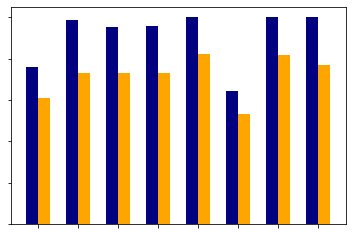

In [725]:
fig, ax = plt.subplots()
ax.set_title('Ensembles score')
ax.bar(ensembles_comparison.index, ensembles_comparison['train_score'], width = -0.3, align = 'edge', color='navy')
ax.bar(ensembles_comparison.index, ensembles_comparison['validation_score'], width = 0.3, align = 'edge' , color='orange')
ax.set_ylabel('Score')
ax.set_xlabel('Ensemble')


In [ ]:
# The search for the optimal model and hyperparameter combination (based on VotingClassifier 
# since this ensemble supports multiple different estimators) has not been successfull:

In [783]:
search_results = pd.DataFrame(best_combination_search)
print(search_results)

                                              models  train_score
0  [(LogisticRegression, LogisticRegression(C=1, ...          0.7
1  [(LogisticRegression, LogisticRegression(C=1, ...          0.7
2  [(SVC, SVC(C=1, break_ties=False, cache_size=2...          0.7
3  [(LogisticRegression, LogisticRegression(C=1, ...          0.7


In [784]:
# Although the scores achieved by individual models which were combined into an ensemble were different,
# the final VotingClassifier ensemble score was 0.7 regardless of the models passed to it.

# This score is higher than any of teh individual scores, however, the final result is significantly 
# worse than the score of the  BaggingClassifier or RandomForestClassifier,# so for the next tasks 
# I would rather use one of these ensembles with DecisionTreeClassifier as a base estimator.

In [785]:
# After performing a series of test, I made a conclusion that the best possible score can be achieved with
# the ensemble methods that combine multiple versions of the same estimator (BaggingClassifier, RandomForestClassifier, ) rather than 
# the ones combining a list of differents estimators (VotingClassifier and StackingClassifier).

In [786]:
# So for the further iteartions I would use BaggingClassifier or RandomForestClassifier.
# The key for reproducibility the would be to stick to the repeatable method for every step of data analysis:
# so it is reasonable to create the standard functions for data processing and cleaning, scaling and modelling.
# Also, in order to replicate the results I would pass an argument 'random_state = 42' to the models 
# which allows to get the same results while running the model again.

### Part 6:
A stakeholder asks you which features most affect the response variable (output). Describe how you would organise a test to determine this.

In [521]:
# I would consider the influence of each feature to the output as a change that occurs in target value
# with change of the output with one unit

In [787]:
!['Approach for features importance calculation']('https://github.com/TataAndBigData/AICORE_project_1_submission/blob/master/Feature_importance_test_approach.png')

libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: Couldn't close file


In [745]:
# I would test this approach on desicion-tree based model in order to compare the results with the built function:
feature_importances = list(dtc_estimator.fit(demo_X, demo_y).feature_importances_)
features = demo_X.columns

In [757]:
feat_imp = pd.DataFrame()
feat_imp['features'] = features
feat_imp['feature_importances'] = feature_importances

In [762]:
feat_imp.sort_values(by = 'feature_importances', ascending = False)

,features,feature_importances
10,alcohol,0.306563
9,sulphates,0.189338
6,total sulfur dioxide,0.125997
3,residual sugar,0.107168
5,free sulfur dioxide,0.103530
2,citric acid,0.062484
0,fixed acidity,0.054460
7,density,0.025270
1,volatile acidity,0.025190
4,chlorides,0.000000


In [ ]:
# The inbuilt function suggests that alcohol has the strongest effect on the target (quality of  wine).